<a href="https://colab.research.google.com/github/Pranalideokate/Apriori/blob/main/ML2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from IPython.display import Image

In [3]:
from google.colab import files
uploaded = files.upload()

Saving data.csv to data.csv


In [4]:
data = pd.read_csv("data.csv")
data

,ID,Age,Income,Gender,Marital Status,Buys
0,1,<21,High,Male,Single,No
1,2,<21,High,Male,Married,No
2,3,21-35,High,Male,Single,Yes
3,4,>35,Medium,Male,Single,Yes
4,5,>35,Low,Female,Single,Yes
5,6,>35,Low,Female,Married,No
6,7,21-35,Low,Female,Married,Yes
7,8,<21,Medium,Male,Single,No
8,9,<21,Low,Female,Married,Yes
9,10,>35,Medium,Female,Single,Yes


In [5]:
le=LabelEncoder();
x=data.iloc[:,:-1]
x=x.apply(le.fit_transform)
print("Age:",list( zip(data.iloc[:,0], x.iloc[:,0])))
print("\nIncome:",list( zip(data.iloc[:,1], x.iloc[:,1])))
print("\nGender:",list( zip(data.iloc[:,2], x.iloc[:,2])))
print("\nmaritialStatus:",list( zip(data.iloc[:,3], x.iloc[:,3])))

Age: [(1, 0), (2, 1), (3, 2), (4, 3), (5, 4), (6, 5), (7, 6), (8, 7), (9, 8), (10, 9), (11, 10), (12, 11), (13, 12), (14, 13)]

Income: [('<21', 1), ('<21', 1), ('21-35', 0), ('>35', 2), ('>35', 2), ('>35', 2), ('21-35', 0), ('<21', 1), ('<21', 1), ('>35', 2), ('<21', 1), ('21-35', 0), ('21-35', 0), ('>35', 2)]

Gender: [('High', 0), ('High', 0), ('High', 0), ('Medium', 2), ('Low', 1), ('Low', 1), ('Low', 1), ('Medium', 2), ('Low', 1), ('Medium', 2), ('Medium', 2), ('Medium', 2), ('High', 0), ('Medium', 2)]

maritialStatus: [('Male', 1), ('Male', 1), ('Male', 1), ('Male', 1), ('Female', 0), ('Female', 0), ('Female', 0), ('Male', 1), ('Female', 0), ('Female', 0), ('Female', 0), ('Male', 1), ('Female', 0), ('Male', 1)]


In [6]:
x

,ID,Age,Income,Gender,Marital Status
0,0,1,0,1,1
1,1,1,0,1,0
2,2,0,0,1,1
3,3,2,2,1,1
4,4,2,1,0,1
5,5,2,1,0,0
6,6,0,1,0,0
7,7,1,2,1,1
8,8,1,1,0,0
9,9,2,2,0,1


In [7]:
y=data.iloc[:,-1]

In [8]:
y

0      No
1      No
2     Yes
3     Yes
4     Yes
5      No
6     Yes
7      No
8     Yes
9     Yes
10    Yes
11    Yes
12    Yes
13     No
Name: Buys, dtype: object

In [9]:
dt=DecisionTreeClassifier()
dt.fit(x,y)

DecisionTreeClassifier()

In [12]:
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',random_state=None, splitter='best')

TypeError: ignored

In [13]:
#[Age < 21, Income = Low,Gender = Female, Marital Status = Married]
query=np.array([1,1,0,0])
pred=dt.predict([query])
pred[0]

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


ValueError: ignored

In [14]:
'Yes'

'Yes'

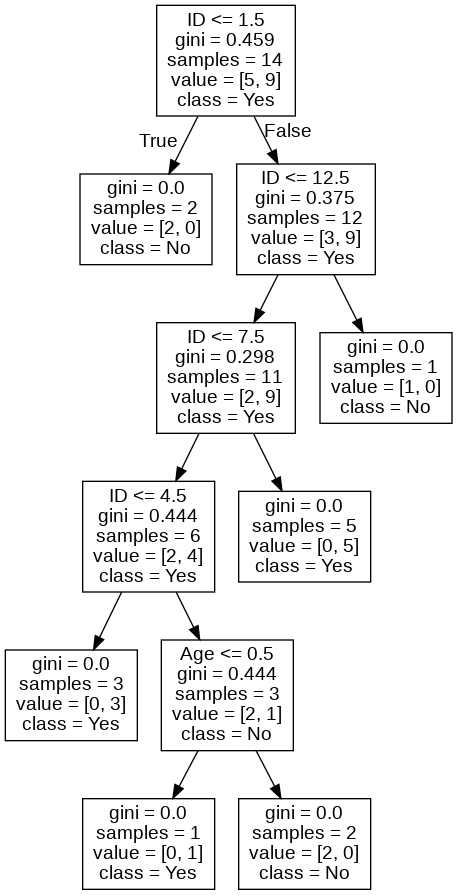

In [15]:
export_graphviz(dt,out_file="data.dot",feature_names=x.columns,class_names=["No","Yes"])
!dot -Tpng data.dot -o tree.png
Image("tree.png")